# Load Model

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
import time
from datetime import datetime
import sys
import av
import pandas as pd
import os
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

In [2]:
try:
    import mediapipe as mp
except:
    !pip install mediapipe
    import mediapipe as mp

In [3]:
# All training dataset paths

root_path = "dataset"

train_path = [os.path.join('{}/train'.format(root_path), f) for f in os.listdir('{}/train'.format(root_path))]
val_path = [os.path.join('{}/val'.format(root_path), f) for f in os.listdir('{}/val'.format(root_path))]
test_path = [os.path.join('{}/test'.format(root_path), f) for f in os.listdir('{}/test'.format(root_path))]

In [4]:
# All labels

train_label_df = pd.read_csv(r'{}/train_labels.csv'.format(root_path), header=None)
test_label_df = pd.read_csv(r'{}/test_ground_truth.csv'.format(root_path), header=None)
val_label_df = pd.read_csv(r'{}/val_ground_truth.csv'.format(root_path), header=None)

# convert all into hashmap - key = u_vid_name , value = label

train_label = {k[0]: k[1] for k in train_label_df.values.tolist()}
test_label = {k[0]: k[1] for k in test_label_df.values.tolist()}
val_label = {k[0]: k[1] for k in val_label_df.values.tolist()}

In [5]:
# Total label + turkish to english translation

total_label = pd.read_csv(r'{}/SignList_ClassId_TR_EN.csv'.format(root_path))
u_len_label = len(total_label['ClassId'].unique())
print("total unique label:", u_len_label)


total unique label: 226


In [6]:
# Chosen 10 classes
k_set = set([169, 24, 208, 122, 66, 156, 87, 42, 33, 20])

# Explore Classes

In [7]:
def plotting(x_label, y_label, x_axis, y_axis, title):
    x = np.arange(len(x_label))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y_label, width, label='Class')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_axis)
    ax.set_xlabel(x_axis)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(x_label)
    ax.legend()

    fig.tight_layout()

    plt.show()

# Train Data for all classes

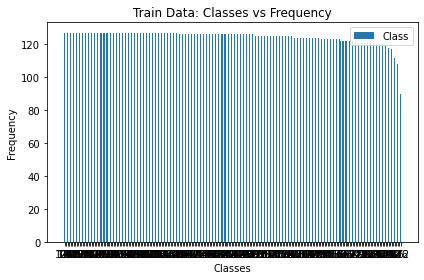

In [8]:
train_counter = {}
for k,v in train_label.items():
    if v not in train_counter:
        train_counter[v] = 0
    train_counter[v] += 1
    
temp_train_arr = []
for k,v in train_counter.items():
    temp_train_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_train_arr.sort(key = lambda x: x[1], reverse=True)
x_label = [x[0] for x in temp_train_arr][:]
y_label = [x[1] for x in temp_train_arr][:]

plotting(x_label, y_label, 'Classes', 'Frequency', 'Train Data: Classes vs Frequency')

# Train Data for top 10 classes

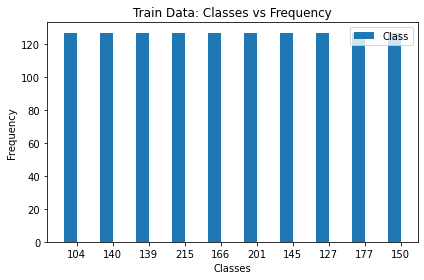

In [9]:
plotting(x_label[:10], y_label[:10], 'Classes', 'Frequency', 'Train Data: Classes vs Frequency')

# Train Data for Chosen 10 classes

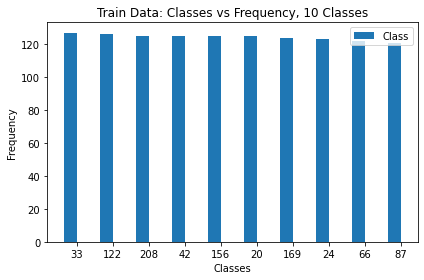

In [10]:
k_train_counter = {}
for k,v in train_label.items():
    if v in k_set:
        if v not in k_train_counter:
            k_train_counter[v] = 0
        k_train_counter[v] += 1
    
temp_k_train_arr = []
for k,v in k_train_counter.items():
    temp_k_train_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_k_train_arr.sort(key = lambda x: x[1], reverse=True)
x_label_train_k = [x[0] for x in temp_k_train_arr][:]
y_label_train_k = [x[1] for x in temp_k_train_arr][:]

plotting(x_label_train_k, y_label_train_k, 'Classes', 'Frequency', 'Train Data: Classes vs Frequency, 10 Classes')

# Validation Data for all classes

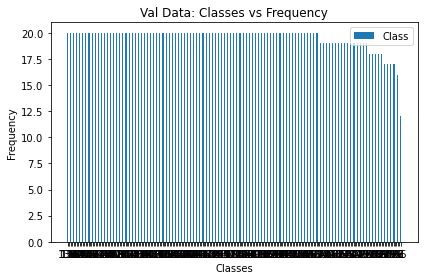

In [11]:
val_counter = {}
for k,v in val_label.items():
    if v not in val_counter:
        val_counter[v] = 0
    val_counter[v] += 1
    
temp_val_arr = []
for k,v in val_counter.items():
    temp_val_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_val_arr.sort(key = lambda x: x[1], reverse=True)
x_label_val = [x[0] for x in temp_val_arr][:]
y_label_val = [x[1] for x in temp_val_arr][:]

plotting(x_label_val, y_label_val, 'Classes', 'Frequency', 'Val Data: Classes vs Frequency')

# Validation Data for top 10 classes

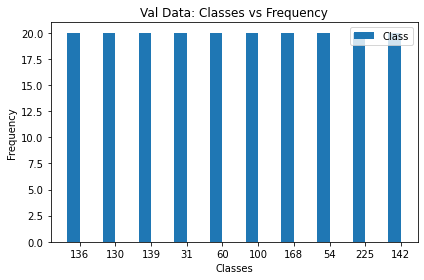

In [12]:
plotting(x_label_val[:10], y_label_val[:10], 'Classes', 'Frequency', 'Val Data: Classes vs Frequency')

# Validaton Data for Chosen 10 classes

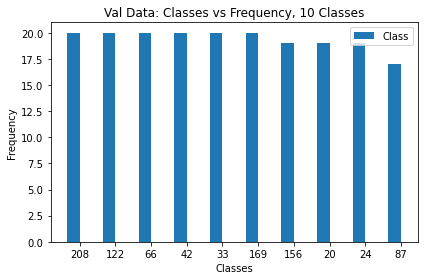

In [13]:
k_val_counter = {}
for k,v in val_label.items():
    if v in k_set:
        if v not in k_val_counter:
            k_val_counter[v] = 0
        k_val_counter[v] += 1
    
temp_k_val_arr = []
for k,v in k_val_counter.items():
    temp_k_val_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_k_val_arr.sort(key = lambda x: x[1], reverse=True)
x_label_val_k = [x[0] for x in temp_k_val_arr][:]
y_label_val_k = [x[1] for x in temp_k_val_arr][:]

plotting(x_label_val_k, y_label_val_k, 'Classes', 'Frequency', 'Val Data: Classes vs Frequency, 10 Classes')

# Test Data for all classes

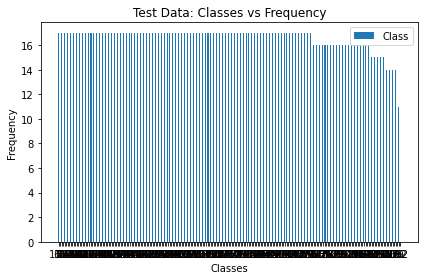

In [14]:
test_counter = {}
for k,v in test_label.items():
    if v not in test_counter:
        test_counter[v] = 0
    test_counter[v] += 1
    
temp_test_arr = []
for k,v in test_counter.items():
    temp_test_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_test_arr.sort(key = lambda x: x[1], reverse=True)
x_label_test = [x[0] for x in temp_test_arr][:]
y_label_test = [x[1] for x in temp_test_arr][:]

plotting(x_label_test, y_label_test, 'Classes', 'Frequency', 'Test Data: Classes vs Frequency')

# Test Data for top 10 classes

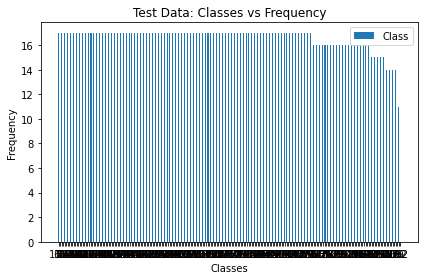

In [15]:
plotting(x_label_test, y_label_test, 'Classes', 'Frequency', 'Test Data: Classes vs Frequency')

# Test Data for Chosen 10 Classes

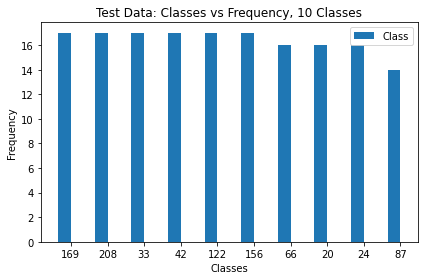

In [16]:
k_test_counter = {}
for k,v in test_label.items():
    if v in k_set:
        if v not in k_test_counter:
            k_test_counter[v] = 0
        k_test_counter[v] += 1
    
temp_k_test_arr = []
for k,v in k_test_counter.items():
    temp_k_test_arr.append([k,v])
    
# 0 element = label , 1 element = frequency
temp_k_test_arr.sort(key = lambda x: x[1], reverse=True)
x_label_test_k = [x[0] for x in temp_k_test_arr][:]
y_label_test_k = [x[1] for x in temp_k_test_arr][:]

plotting(x_label_test_k, y_label_test_k, 'Classes', 'Frequency', 'Test Data: Classes vs Frequency, 10 Classes')

# Data Augmentation

In [17]:
def extract_k_path(paths, label, k_set):
    
    k_path = []
    for path in paths:
        # get key
        p = "_".join(path.split("\\")[1].split("_")[:2])
        # check the label if it belongs to k set
        lab = label[p]
        if lab in k_set:
            k_path.append(path)
            
    return k_path

In [18]:
def create_k_keys(k_set):
    
    # create one hot label
    # e.g. label 107 = 1, label 203 = 2, ...
    k_list = list(k_set)
    k_labels = {}
    for i in range(len(k_set)):
        k_labels[k_list[i]] = i
    return k_labels

In [19]:
# set k
k = 10

# Get set k
k_labels = create_k_keys(k_set)

# Extract paths for top k labels
k_train_path = extract_k_path(train_path, train_label, k_set)
k_test_path = extract_k_path(test_path, test_label, k_set)
k_val_path = extract_k_path(val_path, val_label, k_set)
print("k training dataset: {}".format(len(k_train_path)))
print("k test dataset: {}".format(len(k_test_path)))
print("k val dataset: {}".format(len(k_val_path)))
print('top k set', k_set)
print('top k labels', k_labels)

k training dataset: 2486
k test dataset: 328
k val dataset: 388
top k set {33, 66, 169, 42, 208, 20, 87, 24, 122, 156}
top k labels {33: 0, 66: 1, 169: 2, 42: 3, 208: 4, 20: 5, 87: 6, 24: 7, 122: 8, 156: 9}


# Preprocessing

In [20]:
# pick fix frames
'''
e.g.
input_frame = 5, output_frame = 3

steps 1. create an array and multiply each frame by output factor
    [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5] 
    
step 2. Divide by output section
    [1, 1, 1, 2, 2, | 2, 3, 3, 3, 4, | 4, 4, 5, 5, 5]
    
step 3. Find the center index to pick
    5 // 2 = 2
    
step 4. Select center index from each section
    [1, 1*, 1, 2, 2, | 2, 3*, 3, 3, 4, | 4, 4*, 5, 5, 5]
    
step 5. Return a set of those index
    set([1, 3, 4])
'''
def fix_frame(input_frame: int, output_frame: int) -> set:
    '''
    input
        - number of input frames
        - number of output frames
    output
        - a set of frames
    '''
    if input_frame < output_frame:
        print('Spotted video that have input frame: {} < output frame: {}'.format(input_frame, output_frame))
        return set([i for i in range(1, input_frame+1)])
    
    # create array to pick from
    pick_arr = []
    for i in range(1,input_frame+1):
        for r in range(output_frame):
            pick_arr.append(i)
            
    # decide on index to capture
    # e.g. frame 58//2 = 29
    ind = input_frame//2
    
    # capture frame
    output = set()
    i = 1
    batch = 0
    while (i + (batch * input_frame)) < len(pick_arr):
        if i == ind:
            output.add(pick_arr[i + (batch * input_frame) - 1])
        i+=1
        if i == input_frame + 1:
            i = 1
            batch += 1
    if len(output) != output_frame:
        raise ValueError('output does not have the same frame requirements. output: {}, required: {}'.format(len(output), output_frame))
    return output

In [21]:
def frame_extraction(vid, frames = 30):
    
    selector = fix_frame(len(vid), frames)
    output = []
    for e,frame in enumerate(vid):
        if e+1 in selector:
            output.append(frame)
    
    # edge case
    if len(vid) < frames:
        remainder = frames - len(vid)
        # take last frame
        last_frame = vid[-1]
        for _ in range(remainder):
            output.append(last_frame)
        
    return np.array(output)

In [22]:
def pose_styling(inp_arr):
    # Set up drawing and holistic
    mp_drawing = mp.solutions.drawing_utils
    mp_holistic = mp.solutions.holistic

    mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)

    # Drawing image
    pose_arr = []
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for image in inp_arr:
            results = holistic.process(image)

            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )

            # 2. Right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1)
                                     )

            # 3. Left Hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=1)
                                     )

            # 4. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=1),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1)
                                     )

            pose_arr.append(image)
    return pose_arr

In [23]:
# mask rbg image
def masking(rbg_vid, depth_vid):
    """
    input
        - path for rbg
        - path for depth
    output
        - array of numpy arrays
    """
    rbg_arr = []
    container_rbg = av.open(rbg_vid)

    for packet in container_rbg.demux():
        for frame in packet.decode():
            rbg_arr.append(np.array(frame.to_image()))

    depth_arr = []
    container_depth = av.open(depth_vid)

    for packet in container_depth.demux():
        for frame in packet.decode():
            depth_arr.append(np.array(frame.to_image()))
            
    # pose estimation
    rbg_arr = pose_styling(rbg_arr)

    # display - correct color orientation
    overlay_arr = []
    for i in range(len(rbg_arr)):
        c = cv2.cvtColor(rbg_arr[i], cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(depth_arr[i], cv2.COLOR_BGR2GRAY)
        overlay = cv2.bitwise_and(c,c, mask= gray)
        
        # resize and reshape
        overlay = cv2.resize(overlay, (256,256))
        
        # convert from (h , w, c) to (c, h, w)
        overlay_reshape = np.transpose(overlay, (2, 0, 1))
        
        overlay_arr.append(overlay_reshape)
        
    return np.array(overlay_arr)

# Custom Dataset

In [24]:
class Turkish_Dataset(Dataset):
    def __init__(self, paths, labels):
        self.paths = paths
        self.labels = labels
        self._get_unique()
        
    def _get_unique(self):
        u_vid_depth = {}
        u_vid_color = {}
        u_vid = set()
        for path in self.paths:
            vid = path.split("\\")[-1].split(".")[0] # train\\signer0_sample1_color.mp4 or train\\signer0_sample1_depth.mp4
            vid_split = vid.split("_")
            vid_type = vid_split[-1] # color or depth
            vid_name = "_".join(vid_split[:-1]) # signer0_sample1_color
            if vid_type == "color":
                u_vid_color[vid_name] = path
            elif vid_type == "depth":
                u_vid_depth[vid_name] = path
            else:
                raise ValueError('Detected vid type as neither color nor depth. type is', vid_type)
            u_vid.add(vid_name)
        self.u_vid_depth = u_vid_depth
        self.u_vid_color = u_vid_color
        self.u_vid = list(u_vid)
    
    def __getitem__(self, index):
        vid_name = self.u_vid[index]
        vid_label = self.labels[vid_name]
        
        vid_color = self.u_vid_color[vid_name]
        vid_depth = self.u_vid_depth[vid_name]
        
        # preprocessing
        vid_arr = masking(vid_color, vid_depth)
#         if (len(vid_arr) < 30):
#             print('{} has {} frames'.format(vid_name, len(vid_arr)))
#         vid_arr = frame_extraction(vid_arr, 30)

        # create one-hot-encoding for label
        #label = np.zeros(u_len_label)
        label = np.zeros(k)
        label[k_labels[vid_label]] = 1
        
        # convert arr to tensors
        vid_arr = torch.from_numpy(vid_arr).float()
        label = torch.from_numpy(label).float()
        
        # return masked video array and label
        return vid_arr, label
                
    
    def __len__(self):
        return len(self.u_vid)

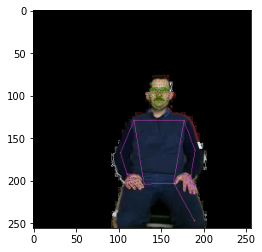

In [25]:
# Create train dataset
ld_train = Turkish_Dataset(k_train_path, train_label)

# show image but clip rbg values
train_img = np.array(np.transpose(ld_train[0][0][0], (1,2,0))).astype('uint8')
train_img = cv2.cvtColor(train_img, cv2.COLOR_RGB2BGR)               
plt.imshow(train_img)
plt.show()

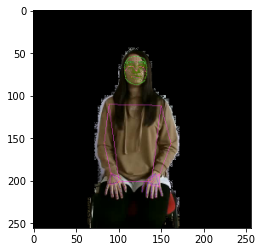

In [26]:
# Create test dataset

ld_test = Turkish_Dataset(k_test_path, test_label)

# show image but clip rbg values
test_img = np.array(np.transpose(ld_test[0][0][0], (1,2,0))).astype('uint8')
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)               
plt.imshow(test_img)
plt.show()

# Masking and Pose Estimation Graphs

The data below are taken from the log files

In [27]:
def plot_graph(data,datasets,y_axis,x_axis):
    """
    Plots a graph of y against x

    Keyword arguments:
        data -- dictionary with keys: train, val, epoch, steps
        datasets -- list of datasets to plot: train, val
        y_axis -- name of the y_axis. example: accuracy
        x_axis -- either epoch or steps
    """
    plt.figure(figsize=(17,8))
    for dataset in datasets:
        target_y = data[dataset]
        target_x = data[x_axis]
        plt.plot(target_x, target_y, label = dataset)
    plt.xlabel(x_axis, fontsize=20)
    plt.ylabel(y_axis, fontsize=20)
    plt.title('Graph of {} against {}'.format(y_axis, x_axis), fontsize=20)
    plt.legend()
    plt.show()

# Masking Training Graph

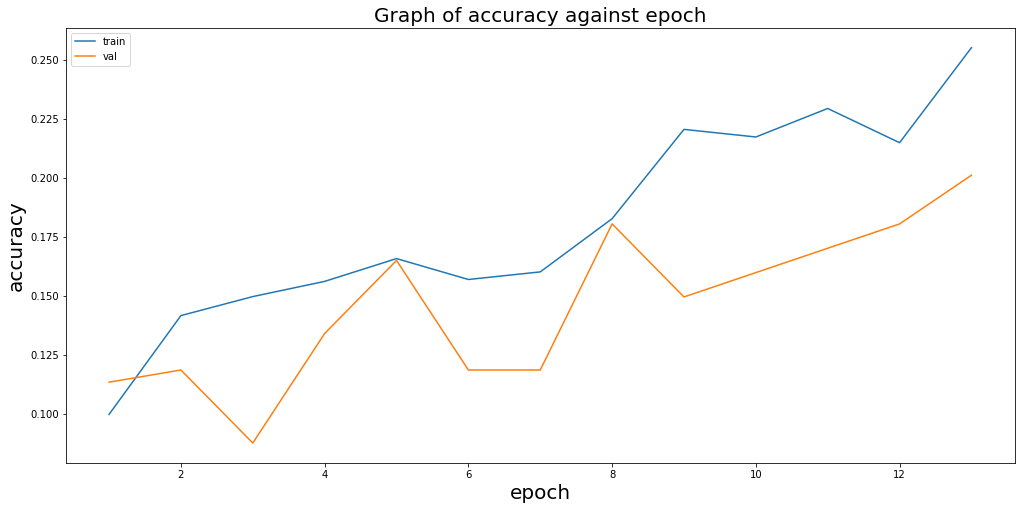

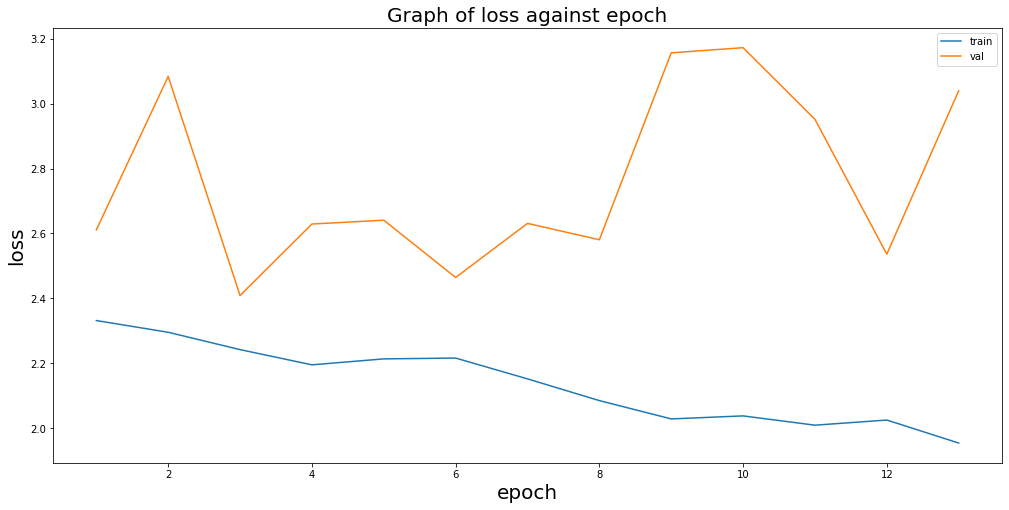

In [28]:
accuracy_stats_epoch = {'train': [0.0997586484312148,
   0.1415929203539823,
   0.14963797264682221,
   0.15607401448109412,
   0.16572807723250202,
   0.1568785197103781,
   0.16009654062751408,
   0.18262268704746581,
   0.22043443282381336,
   0.2172164119066774,
   0.22928399034593724,
   0.21480289621882542,
   0.25502815768302495],
  'val': [0.1134020618556701,
   0.11855670103092783,
   0.08762886597938144,
   0.13402061855670103,
   0.16494845360824742,
   0.11855670103092783,
   0.11855670103092783,
   0.18041237113402062,
   0.14948453608247422,
   0.15979381443298968,
   0.17010309278350516,
   0.18041237113402062,
   0.20103092783505155],
  'epoch': [1,2,3,4,5,6,7,8,9,10,11,12,13]}
loss_stats_epoch = {'train': [2.331821553475034,
   2.2957201752682797,
   2.242299949796758,
   2.1954066215842745,
   2.2137525310366746,
   2.216274891255464,
   2.1521684331991744,
   2.0852597844108867,
   2.028831424306605,
   2.0381316152700597,
   2.009535440410958,
   2.025366262788313,
   1.9545488629656096],
  'val': [2.61094272689721,
   3.0837435015698067,
   2.4089640624744377,
   2.6291749717034016,
   2.640973831267701,
   2.4644596423070455,
   2.631126189354769,
   2.580704276286757,
   3.156428759235927,
   3.172293551650244,
   2.9515834763266877,
   2.5362606436090984,
   3.0398102913186262],
  'epoch': [1,2,3,4,5,6,7,8,9,10,11,12,13]}


plot_graph(accuracy_stats_epoch, ['train', 'val'], 'accuracy', 'epoch')
plot_graph(loss_stats_epoch, ['train', 'val'], 'loss', 'epoch')

# Pose Estimation Training Graph

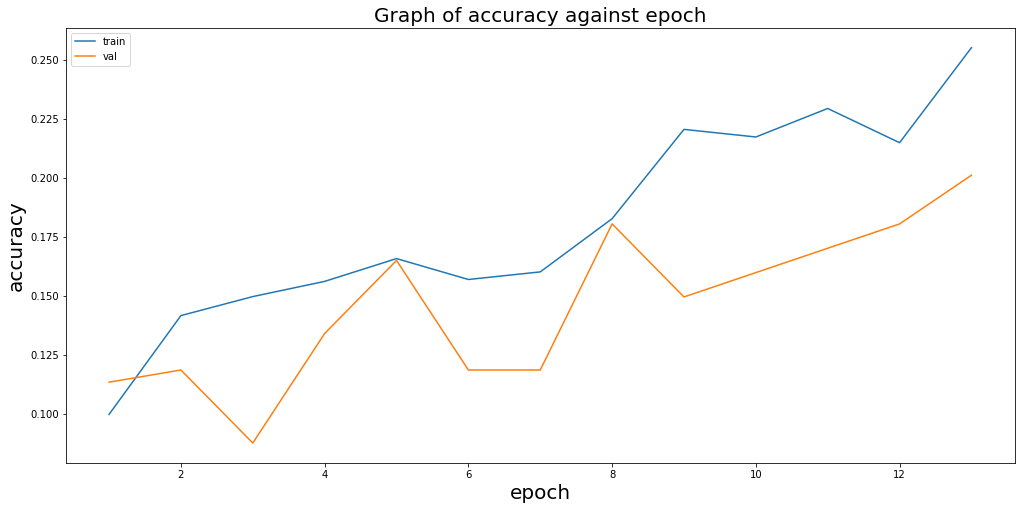

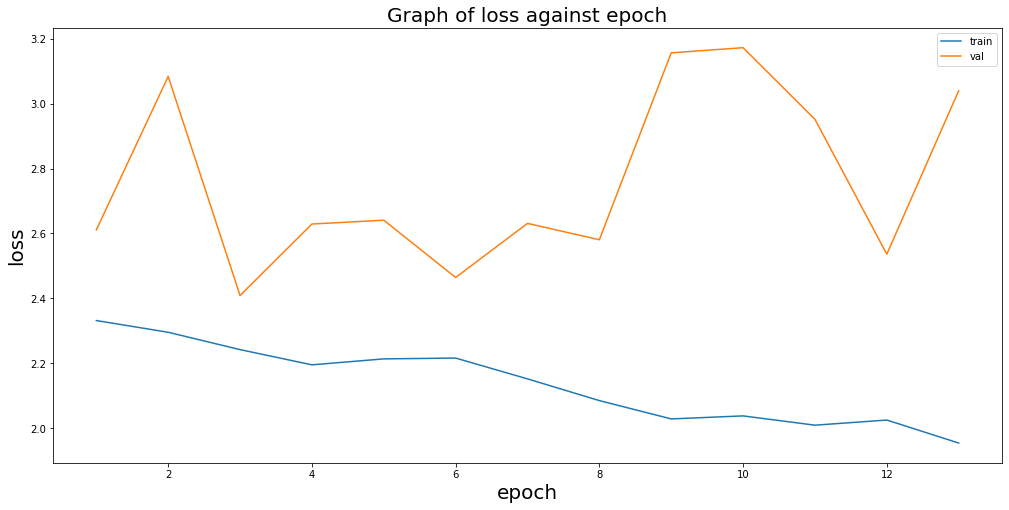

In [29]:
accuracy_stats_epoch = {'train': [0.0997586484312148,
   0.1415929203539823,
   0.14963797264682221,
   0.15607401448109412,
   0.16572807723250202,
   0.1568785197103781,
   0.16009654062751408,
   0.18262268704746581,
   0.22043443282381336,
   0.2172164119066774,
   0.22928399034593724,
   0.21480289621882542,
   0.25502815768302495],
  'val': [0.1134020618556701,
   0.11855670103092783,
   0.08762886597938144,
   0.13402061855670103,
   0.16494845360824742,
   0.11855670103092783,
   0.11855670103092783,
   0.18041237113402062,
   0.14948453608247422,
   0.15979381443298968,
   0.17010309278350516,
   0.18041237113402062,
   0.20103092783505155],
  'epoch': [1,2,3,4,5,6,7,8,9,10,11,12,13]}
loss_stats_epoch = {'train': [2.331821553475034,
   2.2957201752682797,
   2.242299949796758,
   2.1954066215842745,
   2.2137525310366746,
   2.216274891255464,
   2.1521684331991744,
   2.0852597844108867,
   2.028831424306605,
   2.0381316152700597,
   2.009535440410958,
   2.025366262788313,
   1.9545488629656096],
  'val': [2.61094272689721,
   3.0837435015698067,
   2.4089640624744377,
   2.6291749717034016,
   2.640973831267701,
   2.4644596423070455,
   2.631126189354769,
   2.580704276286757,
   3.156428759235927,
   3.172293551650244,
   2.9515834763266877,
   2.5362606436090984,
   3.0398102913186262],
  'epoch': [1,2,3,4,5,6,7,8,9,10,11,12,13]}


plot_graph(accuracy_stats_epoch, ['train', 'val'], 'accuracy', 'epoch')
plot_graph(loss_stats_epoch, ['train', 'val'], 'loss', 'epoch')

# Log for Pose Estimation

Logging to file...
######################Training Started######################
Epoch 1
Average Training Loss of Epoch 1: 2.341728 | Acc: 8.37%
Average Validation Loss of Epoch 1: 2.321577 | Acc: 9.79%
####################Epoch 1 Model Saved#####################
Epoch 2
Average Training Loss of Epoch 2: 2.359352 | Acc: 9.09%
Average Validation Loss of Epoch 2: 2.390876 | Acc: 10.31%
####################Epoch 2 Model Saved#####################
Increment early stopper to 1 because val loss (2.390876097777455) is greater than threshold (2.321576963994921)
Epoch 3
Average Training Loss of Epoch 3: 2.405976 | Acc: 10.22%
Average Validation Loss of Epoch 3: 2.353510 | Acc: 9.79%
####################Epoch 3 Model Saved#####################
Increment early stopper to 2 because val loss (2.353510207122134) is greater than threshold (2.321576963994921)
Epoch 4
Average Training Loss of Epoch 4: 2.384945 | Acc: 10.86%
Average Validation Loss of Epoch 4: 2.336670 | Acc: 9.79%
####################Epoch 4 Model Saved#####################
Increment early stopper to 3 because val loss (2.3366696773116122) is greater than threshold (2.321576963994921)
Epoch 5
Average Training Loss of Epoch 5: 2.382948 | Acc: 11.42%
Average Validation Loss of Epoch 5: 2.364746 | Acc: 10.31%
####################Epoch 5 Model Saved#####################
Increment early stopper to 4 because val loss (2.364745928454645) is greater than threshold (2.321576963994921)
Epoch 6
Average Training Loss of Epoch 6: 2.387035 | Acc: 10.14%
Average Validation Loss of Epoch 6: 2.376421 | Acc: 9.79%
####################Epoch 6 Model Saved#####################
Increment early stopper to 5 because val loss (2.376421209463139) is greater than threshold (2.321576963994921)
Epoch 7
Average Training Loss of Epoch 7: 2.389457 | Acc: 8.77%
Average Validation Loss of Epoch 7: 2.340128 | Acc: 9.79%
####################Epoch 7 Model Saved#####################
Increment early stopper to 6 because val loss (2.340128324695469) is greater than threshold (2.321576963994921)
Epoch 8
Average Training Loss of Epoch 8: 2.389346 | Acc: 10.22%
Average Validation Loss of Epoch 8: 2.374244 | Acc: 10.31%
####################Epoch 8 Model Saved#####################
Increment early stopper to 7 because val loss (2.3742435482359423) is greater than threshold (2.321576963994921)
Epoch 9
Average Training Loss of Epoch 9: 2.385600 | Acc: 9.98%
Average Validation Loss of Epoch 9: 2.479494 | Acc: 9.28%
####################Epoch 9 Model Saved#####################
Increment early stopper to 8 because val loss (2.4794943258934414) is greater than threshold (2.321576963994921)
Epoch 10
Average Training Loss of Epoch 10: 2.404144 | Acc: 9.33%
Average Validation Loss of Epoch 10: 2.436192 | Acc: 9.79%
####################Epoch 10 Model Saved####################
Increment early stopper to 9 because val loss (2.4361918857417155) is greater than threshold (2.321576963994921)
Epoch 11
Average Training Loss of Epoch 11: 2.392008 | Acc: 10.94%
Average Validation Loss of Epoch 11: 2.385612 | Acc: 11.86%
####################Epoch 11 Model Saved####################
Increment early stopper to 10 because val loss (2.3856121301651) is greater than threshold (2.321576963994921)
Model has overfit, early stopping...
#####################Training Finished######################

# Log for Masking

Logging to file...
######################Training Started######################
Epoch 1
Average Training Loss of Epoch 1: 2.331822 | Acc: 9.98%
Average Validation Loss of Epoch 1: 2.610943 | Acc: 11.34%
####################Epoch 1 Model Saved#####################
Epoch 2
Average Training Loss of Epoch 2: 2.295720 | Acc: 14.16%
Average Validation Loss of Epoch 2: 3.083744 | Acc: 11.86%
####################Epoch 2 Model Saved#####################
Increment early stopper to 1 because val loss (3.0837435015698067) is greater than threshold (2.61094272689721)
Epoch 3
Average Training Loss of Epoch 3: 2.242300 | Acc: 14.96%
Average Validation Loss of Epoch 3: 2.408964 | Acc: 8.76%
####################Epoch 3 Model Saved#####################
Epoch 4
Average Training Loss of Epoch 4: 2.195407 | Acc: 15.61%
Average Validation Loss of Epoch 4: 2.629175 | Acc: 13.40%
####################Epoch 4 Model Saved#####################
Increment early stopper to 1 because val loss (2.6291749717034016) is greater than threshold (2.4089640624744377)
Epoch 5
Average Training Loss of Epoch 5: 2.213753 | Acc: 16.57%
Average Validation Loss of Epoch 5: 2.640974 | Acc: 16.49%
####################Epoch 5 Model Saved#####################
Increment early stopper to 2 because val loss (2.640973831267701) is greater than threshold (2.4089640624744377)
Epoch 6
Average Training Loss of Epoch 6: 2.216275 | Acc: 15.69%
Average Validation Loss of Epoch 6: 2.464460 | Acc: 11.86%
####################Epoch 6 Model Saved#####################
Increment early stopper to 3 because val loss (2.4644596423070455) is greater than threshold (2.4089640624744377)
Epoch 7
Average Training Loss of Epoch 7: 2.152168 | Acc: 16.01%
Average Validation Loss of Epoch 7: 2.631126 | Acc: 11.86%
####################Epoch 7 Model Saved#####################
Increment early stopper to 4 because val loss (2.631126189354769) is greater than threshold (2.4089640624744377)
Epoch 8
Average Training Loss of Epoch 8: 2.085260 | Acc: 18.26%
Average Validation Loss of Epoch 8: 2.580704 | Acc: 18.04%
####################Epoch 8 Model Saved#####################
Increment early stopper to 5 because val loss (2.580704276286757) is greater than threshold (2.4089640624744377)
Epoch 9
Average Training Loss of Epoch 9: 2.028831 | Acc: 22.04%
Average Validation Loss of Epoch 9: 3.156429 | Acc: 14.95%
####################Epoch 9 Model Saved#####################
Increment early stopper to 6 because val loss (3.156428759235927) is greater than threshold (2.4089640624744377)
Epoch 10
Average Training Loss of Epoch 10: 2.038132 | Acc: 21.72%
Average Validation Loss of Epoch 10: 3.172294 | Acc: 15.98%
####################Epoch 10 Model Saved####################
Increment early stopper to 7 because val loss (3.172293551650244) is greater than threshold (2.4089640624744377)
Epoch 11
Average Training Loss of Epoch 11: 2.009535 | Acc: 22.93%
Average Validation Loss of Epoch 11: 2.951583 | Acc: 17.01%
####################Epoch 11 Model Saved####################
Increment early stopper to 8 because val loss (2.9515834763266877) is greater than threshold (2.4089640624744377)
Epoch 12
Average Training Loss of Epoch 12: 2.025366 | Acc: 21.48%
Average Validation Loss of Epoch 12: 2.536261 | Acc: 18.04%
####################Epoch 12 Model Saved####################
Increment early stopper to 9 because val loss (2.5362606436090984) is greater than threshold (2.4089640624744377)
Epoch 13
Average Training Loss of Epoch 13: 1.954549 | Acc: 25.50%
Average Validation Loss of Epoch 13: 3.039810 | Acc: 20.10%
####################Epoch 13 Model Saved####################
Increment early stopper to 10 because val loss (3.0398102913186262) is greater than threshold (2.4089640624744377)
Model has overfit, early stopping...
#####################Training Finished######################
